In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('main.csv', index_col=None)
df

,psgc,name,city_munic,province,clean_idx,longitude,latitude,coords,geometry,FID,city_municipality,year,accommodation_capacity,active_establishments_in_the_locality,annual_disaster_drill,availability_of_basic_utilities,budget_for_drrmp,capacity_of_health_services,capacity_of_school_services,capacity_to_generate_local_resource,compliance_to_arta_citizens_charter,compliance_to_national_directives,cost_of_doing_business,cost_of_living,disaster_risk_reduction_plan,distance_to_ports,early_warning_system,education,emergency_infrastructure,employed_population,employment_generation,financial_deepening,financial_technology_capacity,getting_business_permits,health,information_technology_capacity,lgu_investment,land_use_plan,local_economy_growth,local_economy_size,local_risk_assessments,peace_and_order,presence_of_business_and_professional_organizations,presence_of_investment_promotion_unit,productivity,recognition_of_performance,road_network,safety_compliant_business,sanitary_system,social_protection,transportation_vehicles,utilities
0,1705301000,Aborlan,Aborlan,Palawan,"aborlan, palawan",118.548417,9.437101,"9.4371009, 118.5484168",MULTIPOLYGON (((118.57997900000032 9.372150000...,0,Aborlan,2017.0,0.0000,0.2120,2.5000,2.5000,0.0017,0.1098,0.2879,1.4320,2.2597,2.3718,2.2277,1.5203,2.5000,2.1655,2.5000,0.0997,0.8750,0.0457,0.0218,0.1894,0.0463,0.7434,0.0623,0.2976,0.4592,1.8750,0.0012,0.0039,2.5000,0.4161,0.0000,2.5000,0.0145,0.2879,0.0000,0.1943,1.5706,0.1104,0.0204,0.9949
1,1705301000,Aborlan,Aborlan,Palawan,"aborlan, palawan",118.548417,9.437101,"9.4371009, 118.5484168",MULTIPOLYGON (((118.57997900000032 9.372150000...,0,Aborlan,2018.0,0.0000,0.2337,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.1771,1.9907,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0197,0.0423,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0224,0.0072,0.0000,0.0000,0.0218,0.0000,0.0047,0.0000,0.0000,0.1253,0.0000,0.0000,0.0000,0.0000
2,1705301000,Aborlan,Aborlan,Palawan,"aborlan, palawan",118.548417,9.437101,"9.4371009, 118.5484168",MULTIPOLYGON (((118.57997900000032 9.372150000...,0,Aborlan,2019.0,0.0000,0.0000,2.2500,2.1047,0.2189,0.0614,0.1451,0.0074,1.9499,2.2000,1.9655,0.9127,2.4537,2.3204,2.5000,0.1300,0.4984,0.0401,0.0000,0.1339,0.0671,2.3451,0.0689,0.0806,0.3137,2.4231,0.0024,0.0051,2.5000,0.0012,0.0007,2.5000,0.0004,0.0595,0.1006,0.2553,1.4921,0.0007,0.0029,1.8558
3,1705301000,Aborlan,Aborlan,Palawan,"aborlan, palawan",118.548417,9.437101,"9.4371009, 118.5484168",MULTIPOLYGON (((118.57997900000032 9.372150000...,0,Aborlan,2020.0,0.0000,0.1653,2.5000,2.3125,0.0852,0.0587,0.0488,0.0083,2.2404,2.4242,2.2798,0.3017,2.5000,2.4933,2.5000,0.1185,0.5004,0.0385,0.0651,0.1390,0.0631,2.3385,0.0830,0.2679,0.1665,2.5000,0.1419,0.0013,2.5000,0.0072,0.0216,0.6250,0.0413,0.0023,0.0006,0.1643,0.9946,0.0024,0.0026,1.8706
4,1705301000,Aborlan,Aborlan,Palawan,"aborlan, palawan",118.548417,9.437101,"9.4371009, 118.5484168",MULTIPOLYGON (((118.57997900000032 9.372150000...,0,Aborlan,2021.0,0.0000,0.2606,1.2542,2.2948,0.0215,0.1064,0.0145,0.0061,2.1365,2.2619,2.3654,1.6250,2.4737,2.3721,1.2537,0.0835,0.0531,0.0060,0.1052,0.1231,0.0436,1.8169,0.0816,0.0909,0.0220,2.4545,0.0045,0.0067,2.5000,0.0283,0.1089,1.8750,0.0690,0.0000,0.1846,0.1683,1.2502,0.1047,0.0030,1.2478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9799,806023000,Zumarraga,Zumarraga,Samar,"zumarraga, samar",124.841531,11.639055,"11.6390554, 124.8415308",MULTIPOLYGON (((124.87373400000024 11.62500000...,1633,Zumarraga,2018.0,0.0000,0.0004,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.8120,1.0185,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
9800,806023000,Zumarraga,Zumarraga,Samar,"zumarrag

In [10]:
cities = pd.DataFrame(df['name'].unique())
cities.to_csv('cities.csv', index=False)

In [22]:
df.shape

(9804, 52)

In [23]:
type(df)

pandas.core.frame.DataFrame

In [24]:
# df = gpd.GeoDataFrame(df, geometry=df['geometry'])
# type(df)

Lets check for **data types** and **Null** values.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9804 entries, 0 to 9803
Data columns (total 52 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   psgc                                                 9804 non-null   int64  
 1   name                                                 9804 non-null   object 
 2   city_munic                                           9804 non-null   object 
 3   province                                             9804 non-null   object 
 4   clean_idx                                            9804 non-null   object 
 5   longitude                                            9804 non-null   float64
 6   latitude                                             9804 non-null   float64
 7   coords                                               9804 non-null   object 
 8   geometry                                             9756 non-null  

In [26]:
null_rows = df[df['geometry'].isnull()]
print(null_rows)

            psgc                      name                   city_munic  \
2604  1908805000      Datu Hoffer Ampatuan         Datu Hoffer Ampatuan   
2605  1908805000      Datu Hoffer Ampatuan         Datu Hoffer Ampatuan   
2606  1908805000      Datu Hoffer Ampatuan         Datu Hoffer Ampatuan   
2607  1908805000      Datu Hoffer Ampatuan         Datu Hoffer Ampatuan   
2608  1908805000      Datu Hoffer Ampatuan         Datu Hoffer Ampatuan   
2609  1908805000      Datu Hoffer Ampatuan         Datu Hoffer Ampatuan   
2628  1908808000               Datu Salibo                  Datu Salibo   
2629  1908808000               Datu Salibo                  Datu Salibo   
2630  1908808000               Datu Salibo                  Datu Salibo   
2631  1908808000               Datu Salibo                  Datu Salibo   
2632  1908808000               Datu Salibo                  Datu Salibo   
2633  1908808000               Datu Salibo                  Datu Salibo   
3348  1900712000         

In [27]:
df['geometry'].fillna(-2, inplace=True)

In [28]:
null_rows = df[df['geometry'].isnull()]
print(null_rows)

Empty DataFrame
Columns: [psgc, name, city_munic, province, clean_idx, longitude, latitude, coords, geometry, FID, city_municipality, year, accommodation_capacity, active_establishments_in_the_locality, annual_disaster_drill, availability_of_basic_internet_service, availability_of_basic_utilities, budget_for_drrmp, capacity_of_health_services, capacity_of_school_services, capacity_to_generate_local_resource, compliance_to_arta_citizens_charter, compliance_to_national_directives, cost_of_doing_business, cost_of_living, disaster_risk_reduction_plan, distance_to_ports, early_warning_system, education, emergency_infrastructure, employed_population, employment_generation, financial_deepening, financial_technology_capacity, getting_business_permits, health, lgu_investment, land_use_plan, local_economy_growth, local_economy_size, local_risk_assessments, peace_and_order, presence_of_business_and_professional_organizations, presence_of_investment_promotion_unit, productivity, recognition_of_per

In [29]:
null_rows = df[df['city_municipality'].isnull()]
print(null_rows)

            psgc            name      city_munic        province  \
1458  1705306000  Brooke's Point  Brooke'S Point         Palawan   
1459  1705306000  Brooke's Point  Brooke'S Point         Palawan   
1460  1705306000  Brooke's Point  Brooke'S Point         Palawan   
1461  1705306000  Brooke's Point  Brooke'S Point         Palawan   
1462  1705306000  Brooke's Point  Brooke'S Point         Palawan   
1463  1705306000  Brooke's Point  Brooke'S Point         Palawan   
9252  1206316000          T'Boli          T'Boli  South Cotabato   
9253  1206316000          T'Boli          T'Boli  South Cotabato   
9254  1206316000          T'Boli          T'Boli  South Cotabato   
9255  1206316000          T'Boli          T'Boli  South Cotabato   
9256  1206316000          T'Boli          T'Boli  South Cotabato   
9257  1206316000          T'Boli          T'Boli  South Cotabato   

                  clean_idx   longitude  latitude                  coords  \
1458  brookespoint, palawan  117.83897

In [30]:
df['city_municipality'].fillna(-1, inplace=True)

In [31]:
null_rows = df[df['city_municipality'].isnull()]
print(null_rows)

Empty DataFrame
Columns: [psgc, name, city_munic, province, clean_idx, longitude, latitude, coords, geometry, FID, city_municipality, year, accommodation_capacity, active_establishments_in_the_locality, annual_disaster_drill, availability_of_basic_internet_service, availability_of_basic_utilities, budget_for_drrmp, capacity_of_health_services, capacity_of_school_services, capacity_to_generate_local_resource, compliance_to_arta_citizens_charter, compliance_to_national_directives, cost_of_doing_business, cost_of_living, disaster_risk_reduction_plan, distance_to_ports, early_warning_system, education, emergency_infrastructure, employed_population, employment_generation, financial_deepening, financial_technology_capacity, getting_business_permits, health, lgu_investment, land_use_plan, local_economy_growth, local_economy_size, local_risk_assessments, peace_and_order, presence_of_business_and_professional_organizations, presence_of_investment_promotion_unit, productivity, recognition_of_per

We know we have lots of zeros, so lets count them. First we need to change the columns from **object** to **float**.  
  
The conversion to **floats** failed due to there being **'-'** in the columns.  
  
Lets see where they are and how many.

In [32]:
dash_by_column = (df == '-').sum() / 100
dash_by_column

psgc                                                    0.00
name                                                    0.00
city_munic                                              0.00
province                                                0.00
clean_idx                                               0.00
longitude                                               0.00
latitude                                                0.00
coords                                                  0.00
geometry                                                0.00
FID                                                     0.00
city_municipality                                       0.00
year                                                    0.00
accommodation_capacity                                  5.40
active_establishments_in_the_locality                   5.51
annual_disaster_drill                                   5.40
availability_of_basic_internet_service                 81.63
availability_of_basic_ut

We can see that they are all in the DTi features and that `availability_of_basic_internet_service` has 81.63% and the rest around 5.4%.  
  
Lets delete `availability_of_basic_internet_service` and convert the rest to -1 to represent a missing value.

In [33]:
del df['availability_of_basic_internet_service']
df.head(1)

,psgc,name,city_munic,province,clean_idx,longitude,latitude,coords,geometry,FID,city_municipality,year,accommodation_capacity,active_establishments_in_the_locality,annual_disaster_drill,availability_of_basic_utilities,budget_for_drrmp,capacity_of_health_services,capacity_of_school_services,capacity_to_generate_local_resource,compliance_to_arta_citizens_charter,compliance_to_national_directives,cost_of_doing_business,cost_of_living,disaster_risk_reduction_plan,distance_to_ports,early_warning_system,education,emergency_infrastructure,employed_population,employment_generation,financial_deepening,financial_technology_capacity,getting_business_permits,health,lgu_investment,land_use_plan,local_economy_growth,local_economy_size,local_risk_assessments,peace_and_order,presence_of_business_and_professional_organizations,presence_of_investment_promotion_unit,productivity,recognition_of_performance,road_network,safety_compliant_business,sanitary_system,social_protection,transportation_vehicles,utilities
0,1705301000,Aborlan,Aborlan,Palawan,"aborlan, palawan",118.548417,9.437101,"9.4371009, 118.5484168",MULTIPOLYGON (((118.57997900000032 9.372150000...,0,Aborlan,2017.0,0.0000,0.2120,2.5000,2.5000,0.0017,0.1098,0.2879,1.4320,2.2597,2.3718,2.2277,1.5203,2.5000,2.1655,2.5000,0.0997,0.8750,0.0457,0.0218,0.1894,0.0463,0.7434,0.0623,0.4592,1.8750,0.0012,0.0039,2.5000,0.4161,0.0000,2.5000,0.0145,0.2879,0.0000,0.1943,1.5706,0.1104,0.0204,0.9949


In [34]:
df.replace('-', -1, inplace=True)

In [35]:
df[df.columns[12:51]] = df[df.columns[12:51]].astype(float)

In [36]:
df['year'] = df['year'].astype(int)

In [37]:
zeros_by_column = df.eq(0).sum()
zeros_by_column

psgc                                                      0
name                                                      0
city_munic                                                0
province                                                  0
clean_idx                                                 0
longitude                                                 0
latitude                                                  0
coords                                                    0
geometry                                                  0
FID                                                       6
city_municipality                                         0
year                                                      0
accommodation_capacity                                 5081
active_establishments_in_the_locality                   930
annual_disaster_drill                                  2088
availability_of_basic_utilities                        1663
budget_for_drrmp                        

In [38]:
df[df.columns[12:51]].replace(0, -1, inplace=True)

C:\Users\kmedr\AppData\Local\Temp\ipykernel_11356\3796306230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.columns[12:51]].replace(0, -1, inplace=True)


In [39]:
df[df.columns[12:51]] = df[df.columns[12:51]].fillna(-1)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9804 entries, 0 to 9803
Data columns (total 51 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   psgc                                                 9804 non-null   int64  
 1   name                                                 9804 non-null   object 
 2   city_munic                                           9804 non-null   object 
 3   province                                             9804 non-null   object 
 4   clean_idx                                            9804 non-null   object 
 5   longitude                                            9804 non-null   float64
 6   latitude                                             9804 non-null   float64
 7   coords                                               9804 non-null   object 
 8   geometry                                             9804 non-null  

In [58]:
len(df[df['accommodation_capacity'] == 0.0])

5081

In [59]:
df.tail(12)

,psgc,name,city_munic,province,clean_idx,longitude,latitude,coords,geometry,FID,city_municipality,year,accommodation_capacity,active_establishments_in_the_locality,annual_disaster_drill,availability_of_basic_utilities,budget_for_drrmp,capacity_of_health_services,capacity_of_school_services,capacity_to_generate_local_resource,compliance_to_arta_citizens_charter,compliance_to_national_directives,cost_of_doing_business,cost_of_living,disaster_risk_reduction_plan,distance_to_ports,early_warning_system,education,emergency_infrastructure,employed_population,employment_generation,financial_deepening,financial_technology_capacity,getting_business_permits,health,lgu_investment,land_use_plan,local_economy_growth,local_economy_size,local_risk_assessments,peace_and_order,presence_of_business_and_professional_organizations,presence_of_investment_promotion_unit,productivity,recognition_of_performance,road_network,safety_compliant_business,sanitary_system,social_protection,transportation_vehicles,utilities
9792,603047000,Zarraga,Zarraga,Iloilo,"zarraga, iloilo",122.609582,10.822379,"10.8223786, 122.6095819",POLYGON ((122.66113281200012 10.77914047299998...,1632,Zarraga,2017,0.0195,0.3143,2.5000,2.5000,0.0034,0.0712,0.2813,0.1226,2.2872,0.0000,2.0195,0.9914,2.5000,2.4676,2.5000,0.2016,0.8629,0.1808,0.2579,0.3042,0.5000,2.2747,0.2691,0.1543,2.5000,0.0008,0.0003,2.5,0.3184,0.0020,0.0000,0.0001,0.2813,0.0013,0.2779,1.5855,0.2000,0.1580,1.0065
9793,603047000,Zarraga,Zarraga,Iloilo,"zarraga, iloilo",122.609582,10.822379,"10.8223786, 122.6095819",POLYGON ((122.66113281200012 10.77914047299998...,1632,Zarraga,2018,0.0000,0.0040,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0726,1.9907,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1289,0.0923,0.0000,0.0000,0.0000,0.0000,0.0000,0.0328,0.0168,0.0,0.0000,0.0022,0.0000,0.0049,0.0000,0.0000,0.1697,0.0000,0.0000,0.0000,0.0000
9794,603047000,Zarraga,Zarraga,Iloilo,"zarraga, iloilo",122.609582,10.822379,"10.8223786, 122.6095819",POLYGON ((122.66113281200012 10.77914047299998...,1632,Zarraga,2019,0.0528,0.2773,2.4107,2.5000,0.1851,0.0720,0.4784,0.2715,2.3125,2.4988,2.0402,1.7500,2.4074,2.4482,2.5000,0.2359,0.5534,0.1036,0.2419,0.2607,0.3125,2.4418,0.1534,0.0612,2.4487,0.0011,0.0143,2.5,0.2650,0.0102,1.8750,0.1755,0.2226,0.0291,0.2981,2.0515,0.6819,0.0175,1.8781
9795,603047000,Zarraga,Zarraga,Iloilo,"zarraga, iloilo",122.609582,10.822379,"10.8223786, 122.6095819",POLYGON ((122.66113281200012 10.77914047299998...,1632,Zarraga,2020,0.0000,0.3455,2.5000,2.2500,0.0407,0.0578,0.0910,0.1518,2.4761,2.4286,2.1649,1.9792,2.4537,2.4373,2.5000,0.1270,0.5374,0.0801,0.2274,0.2882,0.2500,2.4903,0.1845,0.0498,2.4487,1.0260,0.0194,2.5,0.4337,0.0096,2.5000,0.1636,0.0860,0.0003,0.3215,1.9954,0.7289,0.0392,1.8784
9796,603047000,Zarraga,Zarraga,Iloilo,"zarraga, iloilo",122.609582,10.822379,"10.8223786, 122.6095819",POLYGON ((122.66113281200012 10.77914047299998...,1632,Zarraga,2021,0.0142,0.4427,1.2993,1.5500,0.0026,0.0587,0.0992,0.0946,1.5663,2.3571,2.2475,1.7188,2.4853,2.4487,1.2799,0.1882,0.2928,0.1806,0.2808,0.4945,0.1389,2.1781,0.1553,0.0922,2.4286,0.0021,0.0162,2.5,0.1293,0.0015,2.5000,0.2096,0.2332,0.0227,0.4250,1.8758,0.0917,0.0596,1.2796
9797,603047000,Zarraga,Zarraga,Iloilo,"zarraga, iloilo",122.609582,10.822379,"10.8223786, 122.6095819",POLYGON ((122.66113281200012 10.77914047299998...,1632,Zarraga,2022,0.0123,0.4176,1.0030,0.4617,0.0000,0.0418,0.0077,0.0763,2.0000,1.8077,1.8914,1.9995,1.9998,1.9821,1.0237,0.0727,0.3756,0.0574,0.3997,0.1410,0.0909,2.0000,0.1201,0.0002,1.9054,0.0006,0.0038,2.0,0.0002,0.0095,1.9984,0.1837,0.1120,0.0009,0.3141,1.5003,0.9620,0.0134,1.5003
9798,806023000,Zumarraga,Zumarraga,Samar,"zumarraga, samar",124.841531,11.639055,"11.6390554, 124.8415308",MULTIPOLYGON (((124.87373400000024 11.62500000...,1633,Zumarraga,2017,0.0000,0.0243,2.5000,1.4063,0.0021,0.0930,0.3131,0.7237,1.8189,2.3684,1.5401,2.5000,2.0000,1.5545,2.5000,0.1107,0.8730,0.0907,0.0073,0.0000,0.0000,1.4186,0.0864,0.1720,1.

<function matplotlib.pyplot.show(close=None, block=None)>

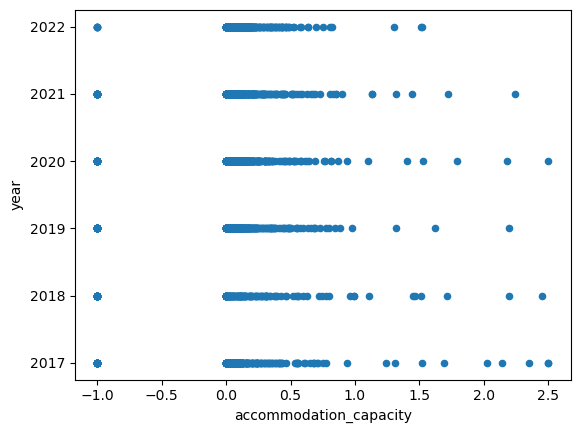

In [29]:
df.plot(kind='scatter', x='accommodation_capacity', y='year')
plt.show

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9794 entries, 0 to 9793
Data columns (total 52 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   psgc                                                 9794 non-null   int64  
 1   name                                                 9794 non-null   object 
 2   city_munic                                           9794 non-null   object 
 3   province                                             9794 non-null   object 
 4   clean_idx                                            9794 non-null   object 
 5   longitude                                            9794 non-null   float64
 6   latitude                                             9794 non-null   float64
 7   coords                                               9794 non-null   object 
 8   geometry                                             9746 non-null  

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9794 entries, 0 to 9793
Data columns (total 51 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   psgc                                                 9794 non-null   int64  
 1   name                                                 9794 non-null   object 
 2   city_munic                                           9794 non-null   object 
 3   province                                             9794 non-null   object 
 4   clean_idx                                            9794 non-null   object 
 5   longitude                                            9794 non-null   float64
 6   latitude                                             9794 non-null   float64
 7   coords                                               9794 non-null   object 
 8   geometry                                             9746 non-null  

In [8]:
df.describe()

,Unnamed: 0,psgc,longitude,latitude,FID,year
count,9804.000000,9.804000e+03,9804.000000,9804.000000,9804.00000,9804.000000
mean,4901.500000,8.239191e+08,122.779690,12.002392,816.50000,2019.500000
std,2830.315353,5.347349e+08,1.814048,3.529530,471.71914,1.707912
min,0.000000,1.028010e+08,117.064731,4.662269,0.00000,2017.000000
25%,2450.750000,4.034040e+08,121.058476,9.001573,408.00000,2018.000000
50%,4901.500000,7.022355e+08,122.796664,11.652115,816.50000,2019.500000
75%,7352.250000,1.130700e+09,124.333688,14.828949,1225.00000,2021.000000
max,9803.000000,1.908824e+09,126.564629,20.787814,1633.00000,2022.000000
